In [244]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [245]:
def choose_hyperplane(d):
    sig = 1/np.sqrt(d)
    return np.random.normal(0, sig, size=(d))

def f(x):
    return 2/(1+np.exp(-x))

def create_ds(W, d, N, method=1):
    alpha = 0.66
    ds=[]
    Y = []
    Z = []
    sig = 1/np.sqrt(d)
    
    for i in range(N):
        x1 = np.random.normal(0,sig,size=(d))
        x2 = create_along_W(W)
        if(np.random.uniform(0,1)<alpha):
            x=x1
        else:
            x=x2
        val = np.dot(W,x)
        z = int(val>=0)
        if(method==1):
            if(z==1):
                y = np.random.uniform(1,2)
            else:
                y=np.random.uniform(0,1)
        else:
            y = f(val)
        ds.append(x)
        Y.append(y)
        Z.append(z)
    
    return np.array(ds), np.array(Y), np.array(Z)
            
    
def create_along_W(W):
    beta = np.random.uniform(-1,1)
    noise = np.random.normal(0,1/np.sqrt(d),size=(d))
    return beta*np.reshape(W, (d)) + noise 

def g(theta, y):
        opt = min(1,y)
        if(theta>y):
            alg = y
        else:
            alg = (1+theta)
        
        return alg/opt

def cr(theta, Y):
    CR = []
    if(len(theta)!=len(Y)):
        print('ERRROR!!!!!!!!!\n\n')
    for i in range(len(theta)):
        CR.append(g(theta[i],Y[i]))
    
    CR = np.array(CR)
    return np.mean(CR)


def create_theta(Z_pred, p , eps):
    thet = []
    for i in range(len(Z_pred)):
        if(Z_pred[i]==1):
            thet.append(np.sqrt(eps)*p)
        else:
            thet.append(1)
            
    return np.array(thet)
    

def grad(Z_pred, Y, eps, p):
    delta = 0.0000001
    err_1 = err_eps(Z_pred, Y, eps, p-delta)
    err_2 = err_eps(Z_pred, Y, eps, p+delta)
    
    return (err_2 - err_1)/(2*delta)



def err_eps(Z_pred, Y, eps, p, limit=250):
    if(len(Z_pred)<=limit):
        theta = create_theta(Z_pred, p, eps)
        err_old = cr(theta, Y) - 1
    else:
        idx = (np.random.choice(len(Z_pred), size=limit, replace=False))
        theta = create_theta(Z_pred[idx], p, eps)
        err_old = cr(theta, Y[idx])
    
    return err_old

def optimize(Z_pred, Y, eps, start):
    eta = 1
    p=start
    del_err = 10
    n_iter = 0
    g=10
    vals = []
    while(abs(g)>0.0001 and n_iter<100):
        err_old = err_eps(Z_pred, Y, eps, p)
        vals.append((err_old,p))
        g = grad(Z_pred, Y, eps, p)
        p = p - eta*g
        
        if(p<0.00001):
            p = p + eta*g
            break
        
        err_new = err_eps(Z_pred, Y, eps, p)
        del_err = err_old-err_new
        n_iter+=1
    
    return min(vals)

    
def gen_method(test_set, pac_learner, X,Y,Z, eps):
    Z_pred = pac_learner.predict(X)
    p_list = []
    param = [10**i for i in range(-4,4)]
    for st in param:
        xx = optimize(Z_pred, Y, eps,st)
        p_list.append(xx)
    p = min(p_list)[1]
    
    return create_theta(pac_learner.predict(test_set), p, eps), p
    

In [247]:
#choosing hyperplane
sample_size=10**4
d=100
W = choose_hyperplane(d)

train_X, train_Y, train_Z = create_ds(W,d,sample_size,method = 0)
ts_X, ts_Y, ts_Z = create_ds(W,d,5*10**2,method=0)



In [248]:
R_N = [100*x for x in range(5,25)]
n_experiments=100

In [249]:
cr_gen_mega = []
eps_gen_mega=[]
prev=1
for i in range(n_experiments):
    cr_gen = []
    err_gen = []
    for N in R_N:
        idx = (np.random.choice(train_X.shape[0], size=2*N, replace=False))
        X = train_X[idx,:]
        Y = train_Y[idx]
        Z = train_Z[idx]
#         print(X.shape)
        X_train, X_val, Y_train, Y_val, Z_train, Z_val = train_test_split(X,Y,Z, test_size=0.5, random_state=42)
        X_train = np.array(X_train)
        Z_train = np.array(Z_train)
        Z_train = Z_train.reshape((len(Z_train),1))
#         print(Z_train.shape,X_train.shape)
        pac_gen = LinearSVC()
        pac_gen.fit(X_train, Z_train)
        eps = 1 - pac_gen.score(X_train, Z_train)
        theta, prev = gen_method(ts_X, pac_gen, X_val, Y_val, Z_val, eps)
        cr_gen.append(cr(theta, ts_Y)-1)
        err_gen.append(1 - pac_gen.score(ts_X,ts_Z) )
#         print("Value of param p = " + str(prev))
    cr_gen_mega.append(cr_gen)
    eps_gen_mega.append(err_gen)
    print('Experiment Number : ' + str(i+1) + ' over\n\n')
cr_g = np.array(cr_gen_mega)
eps_g = np.array(eps_gen_mega)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment Number : 1 over


Experiment Number : 2 over


Experiment Number : 3 over


Experiment Number : 4 over


Experiment Number : 5 over


Experiment Number : 6 over


Experiment Number : 7 over


Experiment Number : 8 over


Experiment Number : 9 over


Experiment Number : 10 over


Experiment Number : 11 over


Experiment Number : 12 over


Experiment Number : 13 over


Experiment Number : 14 over


Experiment Number : 15 over


Experiment Number : 16 over


Experiment Number : 17 over


Experiment Number : 18 over


Experiment Number : 19 over


Experiment Number : 20 over


Experiment Number : 21 over


Experiment Number : 22 over


Experiment Number : 23 over


Experiment Number : 24 over


Experiment Number : 25 over


Experiment Number : 26 over


Experiment Number : 27 over


Experiment Number : 28 over


Experiment Number : 29 over


Experiment Number : 30 over


Experiment Number : 31 over


Experiment Number : 32 over


Experiment Number : 33 over


Experiment Number :

In [250]:
def err_means(a):
    mu = np.mean(a, axis=0)
    err = np.std(a, axis=0)
    return mu,err

cr_gen_mean, cr_gen_err = err_means(cr_g)
eps_gen_mean, eps_gen_err = err_means(eps_g)

In [252]:
def filter_samples(X,Y,Z, delta):
    N = len(Y)
    new_X = []
    new_Y = []
    new_Z = []
    for i in range(N):
        if abs(Y[i]-1) > delta:
            new_X.append(X[i])
            new_Y.append(Y[i])
            new_Z.append(Z[i])
    new_Z = np.array(new_Z)
    return np.array(new_X), np.array(new_Y), np.reshape(new_Z, (len(new_Z),1))


def err_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta, limit=250):
    
    if(len(X_train)<=limit or limit==0):
        nX,nY,nZ = filter_samples(X_train, Y_train, Z_train, delta)
    else:
        idx = (np.random.choice(X_train.shape[0], size=limit, replace=False))
        X = X_train[idx,:]
        Y = Y_train[idx]
        Z = Z_train[idx]
        nX,nY,nZ = filter_samples(X,Y,Z, delta)
    
    if(abs(sum(nZ))==len(nZ)):
        return 0.1
    pac_marg = LinearSVC()
    pac_marg.fit(nX, nZ)
    theta = create_theta_marg(pac_marg, X_val, delta)
    err = cr(theta, Y_val)-1
    return err

def grad_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta):
    change = 0.000001
    delta1 = delta-change
    delta2 = delta+change
    err1 =  err_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta1)
    err2 =  err_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta2)
    return (err2 - err1)/(2*change)

def optimize_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val,start):
    delta=start
    g = grad_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta)
    n_iter = 1
    vals=[]
    err = err_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta)
    vals.append((err, delta))
    N1 = len(X_val)
    tau = 0.05/(N1**0.25)
    while(abs(g)>0.01 and n_iter<20 and err>0.01):
        eta = (start*0.1)/(n_iter+2)
        delta = delta-eta*g
        if(delta>tau):
            delta = tau
            break
        if(delta<0.000001):
            delta=0.000001
            break
            
        g = grad_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta)
        n_iter+=1
        err = err_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta)
        vals.append((err, delta))
#     print(min(vals)[1])
    vals.sort()
    return vals[0]

def create_theta_marg(pac_marg, test_set, delta):
    N = len(test_set)
    thet=[]
    Z_pred = pac_marg.predict(test_set)
    for i in range(N):
        if(Z_pred[i]==1):
            thet.append(delta)
        else:
            thet.append(1+delta)
    return np.array(thet)

In [253]:
cr_marg_mega=[]
eps_marg_whole=[]
eps_marg_filtered = []


for i in range(n_experiments):
    cr_marg=[]
    eps_marg_w=[]
    eps_marg_f=[]
    for N in R_N:
        idx = (np.random.choice(train_X.shape[0], size=2*N, replace=False))
        X = train_X[idx,:]
        Y = train_Y[idx]
        Z = train_Z[idx]
#         print(X.shape)
        X_train, X_val, Y_train, Y_val, Z_train, Z_val = train_test_split(X,Y,Z, test_size=0.5, random_state=42)
        X_train = np.array(X_train)
        Z_train = np.array(Z_train)
        Z_train = Z_train.reshape((len(Z_train),1))
        
        
        delta=min(0.0005,0.001/(N**0.25))
        err = err_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val, delta, limit=0)
        del_list = [(err,delta)]
        
        param_list = [10**i for i in range(-5,0)]
        for start in param_list:
#             print(start)
            start1 = start/(N**0.25)
            del_list.append(optimize_delta(X_train, Y_train, Z_train, X_val, Y_val, Z_val,start1))
        
        del_list.sort()
        delta = del_list[0][1]
        
        nX,nY,nZ = filter_samples(X_train, Y_train, Z_train, delta)
        hh=1
        while(hh<len(del_list) and abs(sum(nZ))==len(nZ)):
            delta= del_list[hh][1]
            nX,nY,nZ = filter_samples(X_train, Y_train, Z_train,delta)
            hh+=1
        
        if(abs(sum(nZ))==len(nZ)):
            delta/=2
            nX,nY,nZ = filter_samples(X_train, Y_train, Z_train,delta)
            
            
        pac_marg = LinearSVC()
        pac_marg.fit(nX, nZ)
        theta = create_theta_marg(pac_marg, ts_X, delta)
        ans = cr(theta, ts_Y)-1
#         print(ans)
        cr_marg.append(ans)
        eps_marg_w.append(1 - pac_marg.score(ts_X,ts_Z))
        
        tsnX,tsnY,tsnZ = filter_samples(ts_X, ts_Y, ts_Z, delta)
        
        eps_marg_f.append(1-pac_marg.score(tsnX,tsnZ))
#         print('For N = '+ str(N) + ' Value of delta used = ' + str(delta))
        
        
    cr_marg_mega.append(cr_marg)
    eps_marg_whole.append(eps_marg_w)
    eps_marg_filtered.append(eps_marg_f)
    print('Experiment Number : ' + str(i+1) + ' over\n\n')



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment Number : 1 over


Experiment Number : 2 over


Experiment Number : 3 over


Experiment Number : 4 over


Experiment Number : 5 over


Experiment Number : 6 over


Experiment Number : 7 over


Experiment Number : 8 over


Experiment Number : 9 over


Experiment Number : 10 over


Experiment Number : 11 over


Experiment Number : 12 over


Experiment Number : 13 over


Experiment Number : 14 over


Experiment Number : 15 over


Experiment Number : 16 over


Experiment Number : 17 over


Experiment Number : 18 over


Experiment Number : 19 over


Experiment Number : 20 over


Experiment Number : 21 over


Experiment Number : 22 over


Experiment Number : 23 over


Experiment Number : 24 over


Experiment Number : 25 over


Experiment Number : 26 over


Experiment Number : 27 over


Experiment Number : 28 over


Experiment Number : 29 over


Experiment Number : 30 over


Experiment Number : 31 over


Experiment Number : 32 over


Experiment Number : 33 over


Experiment Number :

In [254]:
cr_marg=np.array(cr_marg_mega)
cr_marg_mean, cr_marg_err = err_means(cr_marg)


eps_marg_W=np.array(eps_marg_whole)
eps_marg_W_mean, eps_marg_W_err = err_means(eps_marg_W)


eps_marg_F=np.array(eps_marg_filtered)
eps_marg_F_mean, eps_marg_F_err = err_means(eps_marg_F)


In [256]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


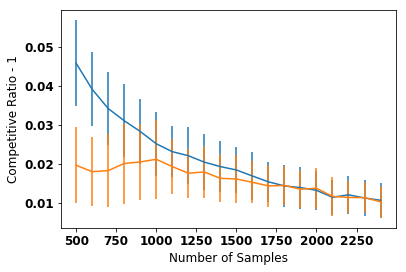

In [257]:
plt.errorbar(R_N, cr_gen_mean, yerr= cr_gen_err ) 
plt.errorbar(R_N, cr_marg_mean, yerr=cr_marg_err) 

# plt.legend() 
plt.xlabel('Number of Samples') 
# naming the y axis 
plt.ylabel('Competitive Ratio - 1') 
# plt.title('Performance Plots for Margin Based and General PAC Learning when d=' + str(d)) 
plt.show()




C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


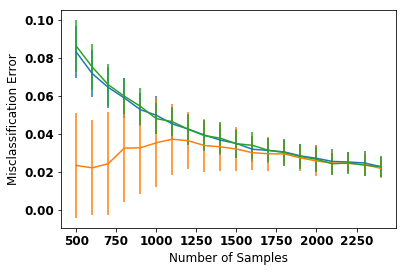

In [259]:
plt.errorbar(R_N, eps_marg_W_mean, yerr= eps_marg_W_err  ,label = "Error of Margin Learner on entire samples ") 
plt.errorbar(R_N, eps_marg_F_mean, yerr=eps_marg_F_err , label = "Error of Margin Learner on filtered samples") 
plt.errorbar(R_N, eps_gen_mean, yerr=eps_gen_err , label = "Error of General PAC learner") 

# plt.title('Error Plots for Margin Based and General PAC Learning when d=' + str(d)) 


# plt.legend() 
plt.xlabel('Number of Samples') 
# naming the y axis 
plt.ylabel('Misclassification Error') 
plt.show()


In [238]:
#saving
np.savez('d'+str(d), eps_marg_W_mean = eps_marg_W_mean, eps_marg_W_err=eps_marg_W_err, eps_marg_F_mean=eps_marg_F_mean, eps_marg_F_err=eps_marg_F_err, eps_gen_mean = eps_gen_mean, eps_gen_err=eps_gen_err, cr_gen_mean=cr_gen_mean, cr_gen_err=cr_gen_err, cr_marg_mean=cr_marg_mean, cr_marg_err = cr_marg_err )
